In [ ]:
pip install torch

In [ ]:
pip install torchvision

In [ ]:
pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.0 MB/s eta 0:00:00


In [ ]:
import torch
from torch.utils.data import DataLoader
import torchvision.models as models
import torchvision
from torch import nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
mean = (0.5, 0.5, 0.5)
std = (0.5, 0.5, 0.5)
normalize = transforms.Normalize(mean, std)

train_data = datasets.CIFAR10(root = './sample_data' , train = True , download = True, transform = transforms.ToTensor())
test_data = datasets.CIFAR10(root = './sample_data' , train = False , download = True, transform = transforms.ToTensor())

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
train_data[0]

(tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
          [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
          [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
          ...,
          [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
          [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
          [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],
 
         [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
          [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
          [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
          ...,
          [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
          [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
          [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],
 
         [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
          [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
          [0.0824, 0.0000, 0.0314,  ...,

In [ ]:
train_data[0][0].shape

torch.Size([3, 32, 32])

In [ ]:
resnet_train = datasets.CIFAR10(root = './sample_data' , train = True , download = True, transform = transforms.ToTensor())
resnet_test = datasets.CIFAR10(root = './sample_data' , train = False , download = True, transform = transforms.ToTensor())

resnet_train[0][0].shape

Files already downloaded and verified
Files already downloaded and verified


torch.Size([3, 32, 32])

In [ ]:


mean = (0.5, 0.5, 0.5)
std = (0.5, 0.5, 0.5)
normalize = transforms.Normalize(mean, std)
train_data.transform = transforms.Compose([transforms.ToTensor(),transforms.Resize((227,227)),normalize])
test_data.transform = transforms.Compose([transforms.ToTensor(),transforms.Resize((227,227)),normalize])

In [ ]:

resnet_train[0][0].shape

torch.Size([3, 32, 32])

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


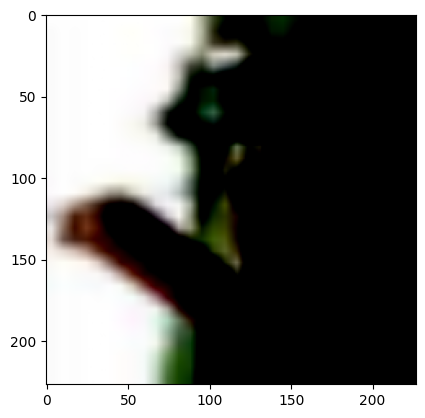

In [ ]:
first_train_image = plt.imshow(train_data[2][0].numpy().T)
first_train_image

In [ ]:
train_data[2]

(tensor([[[ 1.0000,  1.0000,  1.0000,  ...,  0.9843,  0.9843,  0.9843],
          [ 1.0000,  1.0000,  1.0000,  ...,  0.9843,  0.9843,  0.9843],
          [ 1.0000,  1.0000,  1.0000,  ...,  0.9843,  0.9843,  0.9843],
          ...,
          [-0.1686, -0.1686, -0.1686,  ..., -0.3725, -0.3725, -0.3725],
          [-0.1686, -0.1686, -0.1686,  ..., -0.3725, -0.3725, -0.3725],
          [-0.1686, -0.1686, -0.1686,  ..., -0.3725, -0.3725, -0.3725]],
 
         [[ 1.0000,  1.0000,  1.0000,  ...,  0.9843,  0.9843,  0.9843],
          [ 1.0000,  1.0000,  1.0000,  ...,  0.9843,  0.9843,  0.9843],
          [ 1.0000,  1.0000,  1.0000,  ...,  0.9843,  0.9843,  0.9843],
          ...,
          [-0.1137, -0.1137, -0.1137,  ..., -0.3255, -0.3255, -0.3255],
          [-0.1137, -0.1137, -0.1137,  ..., -0.3255, -0.3255, -0.3255],
          [-0.1137, -0.1137, -0.1137,  ..., -0.3255, -0.3255, -0.3255]],
 
         [[ 1.0000,  1.0000,  1.0000,  ...,  0.9843,  0.9843,  0.9843],
          [ 1.0000,  1.0000,

In [ ]:
print(f'Train_data shape : {len(train_data)}')
print(f'Test_data shape : {len(test_data)}')

Train_data shape : 50000
Test_data shape : 10000


In [ ]:
train_data[2][0].shape

torch.Size([3, 227, 227])

In [ ]:
test_data[2][0].shape

torch.Size([3, 227, 227])

In [ ]:
#Preprocessing task - Data Augmentation
                  # - Rotation, Cropping and Mirror Reflection
                  # - Normalization (mean = 0.5 ,std = 0.5)

data_augmentation_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(size=(32, 32), padding=4)
])

train_loader = DataLoader(train_data, batch_size=1, shuffle=True)

In [ ]:
resnet_train_loader = DataLoader(resnet_train , batch_size = 1, shuffle= True)

augmented_data = []

for image,labels in resnet_train_loader:
    for _ in range(5):
        augmented_image = data_augmentation_transform(image)
        augmented_data.extend([(img, label) for img, label in zip(augmented_image, labels)])

resnet_train = torch.utils.data.ConcatDataset([resnet_train, *augmented_data])

print(f'Train_data shape : {len(train_data)}')
print(f'Test_data shape : {len(test_data)}')

Train_data shape : 50000
Test_data shape : 10000


In [ ]:
print(f'Train_data shape : {len(resnet_train)}')
print(f'Test_data shape : {len(resnet_test)}')

Train_data shape : 550000
Test_data shape : 10000


In [ ]:
resnet_train_loader = DataLoader(resnet_train , batch_size = 1000, shuffle= True)
resnet_train_loader = DataLoader(resnet_train , batch_size = 1000, shuffle= True)

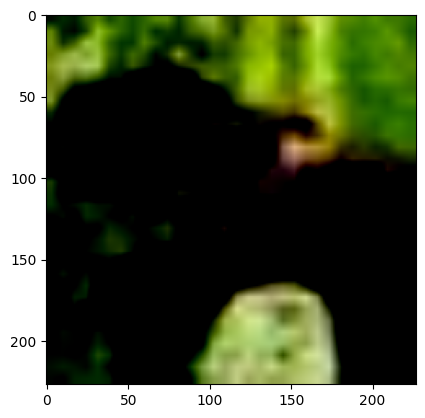

In [ ]:
second_train_image = plt.imshow(train_data[2500][0].numpy().T)
second_train_image

#AlexNet Architecture

4.1-m780.svg

In [ ]:
#lets make the AlexNet model from scratch(just for demo purpose no cretivity :) and then directly configured it from torchvision model

alex_train = train_data
alex_test = test_data

# alex_train.transform = transforms.Compose([
#     transforms.Resize((227, 227)),  # Resizing directly to (227, 227)
#     transforms.ToTensor(),
#     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
# ])

# alex_test.transform = transforms.Compose([
#     transforms.Resize((227, 227)),  # Resizing directly to (227, 227)
#     transforms.ToTensor(),
#     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
# ])

class AlexNet(nn.Module):
    def __init__(self, num_classes=10,dropout_parameter=0.5):
        super(AlexNet, self).__init__()
        self.feature = nn.Sequential(
            nn.Conv2d(3, 96, kernel_size=11, stride=4),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),

            nn.Conv2d(96, 256, kernel_size=5,padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),

            nn.Conv2d(256, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),

            nn.Conv2d(384, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),

            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),
        )

        self.fc = nn.Sequential(   #fully connected feed forward layer
            nn.Dropout(dropout_parameter),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),

            nn.Dropout(dropout_parameter),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),

            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.feature(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        return x



alex_model = AlexNet()

print(alex_model)



AlexNet(
  (feature): Sequential(
    (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.5, inplace=False)
    (4): L

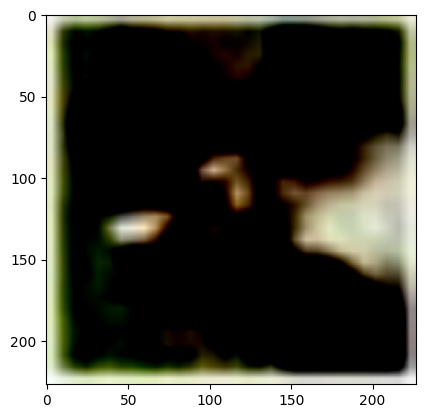

In [ ]:
plt.imshow(alex_train[500][0].numpy().T)

In [ ]:
alex_train[0][0].shape

torch.Size([3, 227, 227])

In [ ]:
!nvidia-smi

Wed Dec 27 07:32:28 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   61C    P8              11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [ ]:
alex_model.to(device)

AlexNet(
  (feature): Sequential(
    (0): Conv2d(3, 96, kernel_size=(11, 11), stride=(4, 4))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.5, inplace=False)
    (4): L

In [ ]:
#Training this scratch model

batch_size = 50000 #for batch gradient descent

alex_train_loader = DataLoader(alex_train, batch_size=batch_size, shuffle=True)
alex_test_loader = DataLoader(alex_test, batch_size=batch_size, shuffle=False)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(alex_model.parameters(), lr=0.001, momentum = 0.9)

num_epochs = 5

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = alex_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 2000 == 1999:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Batch [{i + 1}/{len(train_loader)}], Loss: {running_loss / 200:.4f}')
            running_loss = 0.0

print('Finished Training')

correct = 0
total = 0

with torch.no_grad():
    for data in alex_test_loader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = alex_model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the model on the test images: {accuracy:.2f}%')

Epoch [1/5], Batch [2000/50000], Loss: 23.0291
Epoch [1/5], Batch [4000/50000], Loss: 22.3632
Epoch [1/5], Batch [6000/50000], Loss: 20.9436
Epoch [1/5], Batch [8000/50000], Loss: 20.2640
Epoch [1/5], Batch [10000/50000], Loss: 19.4029
Epoch [1/5], Batch [12000/50000], Loss: 18.8615
Epoch [1/5], Batch [14000/50000], Loss: 18.3581
Epoch [1/5], Batch [16000/50000], Loss: 18.1869
Epoch [1/5], Batch [18000/50000], Loss: 17.6761
Epoch [1/5], Batch [20000/50000], Loss: 17.5361
Epoch [1/5], Batch [22000/50000], Loss: 17.1399
Epoch [1/5], Batch [24000/50000], Loss: 17.2101
Epoch [1/5], Batch [26000/50000], Loss: 16.6729
Epoch [1/5], Batch [28000/50000], Loss: 16.4472
Epoch [1/5], Batch [30000/50000], Loss: 16.7310
Epoch [1/5], Batch [32000/50000], Loss: 16.1932
Epoch [1/5], Batch [34000/50000], Loss: 16.2250
Epoch [1/5], Batch [36000/50000], Loss: 16.0876
Epoch [1/5], Batch [38000/50000], Loss: 16.0183
Epoch [1/5], Batch [40000/50000], Loss: 15.7984
Epoch [1/5], Batch [42000/50000], Loss: 15.8

In [ ]:
# Saving this model checkpoint
torch.save({
    'model_state_dict': alex_model.state_dict(),  # Saving the model state_dict
}, 'alex_model_checkpoint.pth')

In [ ]:
alex_pretrained = models.alexnet(pretrained = True)

trainable_parameter = 0
total_parameter = 0

for param in alex_pretrained.parameters():
  total_parameter += 1
  if param.requires_grad == True:
    trainable_parameter +=1
    param.requires_grad = False
  else:
    param.requires_grad = False

print(f"Percentage of Trainable Parameter : {(trainable_parameter*1.0/total_parameter)*100}")

In [ ]:
alex_pretrained.fc = nn.Linear(4096 ,10)
alex_pretrained.to(device)

criterion_pre = nn.CrossEntropyLoss()
optimizer_pre = optim.Adam([parameter for parameter in alex_pretrained.parameters() if parameter.requires_grad == True], lr=0.001)

num_epochs = 10

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        alex_pretrained.train()

        optimizer_pre.zero_grad()

        outputs = alex_pretrained(inputs)
        loss = criterion_pre(outputs, labels)
        loss.requires_grad = True
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 200 == 199:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Batch [{i + 1}/{len(train_loader)}], Loss: {running_loss / 200:.4f}')
            running_loss = 0.0

print('Finished Training')

correct = 0
total = 0

with torch.no_grad():
    for data in alex_test_loader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        alex_pretrained.eval()
        outputs = alex_pretrained(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the model on the test images: {accuracy:.2f}%')

In [ ]:
# Saving this model checkpoint
torch.save({
    'model_state_dict': alex_pretrained.state_dict(),  # Saving the model state_dict
}, 'alex_pretrained_model_checkpoint.pth')

In [ ]:
def alexnet_training(model_param):
  batch_size = 50000 #for batch gradient descent
  model_param.to(device)

  alex_train_loader = DataLoader(alex_train, batch_size=batch_size, shuffle=True)
  alex_test_loader = DataLoader(alex_test, batch_size=batch_size, shuffle=False)

  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(model_param.parameters(), lr=0.001)
  num_epochs = 10
  for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model_param(inputs)
        loss = criterion(outputs, labels)
        loss.requires_grad = True
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 200 == 199:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Batch [{i + 1}/{len(train_loader)}], Loss: {running_loss / 200:.4f}')
            running_loss = 0.0
  print('Finished Training')
  correct = 0
  total = 0
  with torch.no_grad():
    for data in alex_test_loader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model_param(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f'Accuracy of the model on the test images for regularisation {model_param.dropout_parameter}: {accuracy:.2f}%')

model_0_regularisation = AlexNet(dropout_parameter = 0)
alexnet_training(model_0_regularisation)
print('\n')
model_3_regularisation = AlexNet(dropout_parameter = 0.3)
alexnet_training(model_3_regularisation)
print('\n')
model_9_regularisation = AlexNet(dropout_parameter = 0.9)
alexnet_training(model_9_regularisation)
print('\n')

In [ ]:
torch.save({
    'model_state_dict': AlexNet(dropout_parameter = 0).state_dict(),  # Saving the model state_dict
}, 'alex_0_model_checkpoint.pth')

torch.save({
    'model_state_dict': AlexNet(dropout_parameter = 0.3).state_dict(),  # Saving the model state_dict
}, 'alex_3_model_checkpoint.pth')

torch.save({
    'model_state_dict': AlexNet(dropout_parameter = 0.9).state_dict(),  # Saving the model state_dict
}, 'alex_9_model_checkpoint.pth')

# ResNet

In [ ]:
class BasicBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(BasicBlock, self).__init__()

        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_channels != out_channels:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels)
            )

    def forward(self, x):
        residual = self.shortcut(x)

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        out += residual
        out = self.relu(out)

        return out

In [ ]:
class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10,dropout_parameter = 0.5):
        super(ResNet, self).__init__()
        self.in_channels = 16

        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1, bias=False)  # Adjusted for smaller input like 32*32 image dim
        self.bn1 = nn.BatchNorm2d(16)
        self.relu = nn.ReLU(inplace=True)

        self.layer1 = self.make_layer(block, 16, num_blocks[0], stride=1)
        self.layer2 = self.make_layer(block, 32, num_blocks[1], stride=2)
        self.layer3 = self.make_layer(block, 64, num_blocks[2], stride=2)

        self.avg_pool = nn.AdaptiveAvgPool2d((1, 1)) #for average pooling as per  alexnet paper for adaptive output activation map dim (optional)
        self.fc = nn.Sequential(nn.Dropout(dropout_parameter),nn.Linear(64, num_classes))

    def make_layer(self, block, out_channels, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_channels, out_channels, stride))
            self.in_channels = out_channels  # Updating in_channels for the next layer which is imp
        return nn.Sequential(*layers)

    def forward(self, x):
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)

        out = self.avg_pool(out)
        out = out.view(out.size(0), -1)
        out = self.fc(out)

        return out

resnet_model = ResNet(BasicBlock, [2, 2, 2])
resnet_model.to(device)


In [ ]:
def resnet_training(model_param):
  batch_size = 1000 #for mini-batch gradient descent

  resnet_train_loader = DataLoader(resnet_train, batch_size=batch_size, shuffle=True)
  resnet_test_loader = DataLoader(resnet_test, batch_size=batch_size, shuffle=False)

  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(model_param.parameters(), lr=0.001)
  num_epochs = 10
  for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(resnet_train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model_param(inputs)
        loss = criterion(outputs, labels)
        loss.requires_grad = True
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 200 == 199:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Batch [{i + 1}/{len(train_loader)}], Loss: {running_loss / 200:.4f}')
            running_loss = 0.0
  print('Finished Training')
  correct = 0
  total = 0
  with torch.no_grad():
    for data in resnet_test_loader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model_param(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f'Accuracy of the model on the test images for regularisation {model_param.dropout_parameter}: {accuracy:.2f}%')

resnet_model_0_regularisation = ResNet(dropout_parameter = 0)
resnet_training(model_0_regularisation)
print('\n')
resnet_model_3_regularisation = ResNet(dropout_parameter = 0.3)
resnet_training(model_3_regularisation)
print('\n')
resnet_model_9_regularisation = ResNet(dropout_parameter = 0.9)
resnet_training(model_9_regularisation)
print('\n')

In [ ]:
# Saving this model checkpoint
torch.save({
    'model_state_dict': alex_pretrained.state_dict(),  # Saving the model state_dict
}, 'alex_pretrained_model_checkpoint.pth')

torch.save({
    'model_state_dict': alex_pretrained.state_dict(),  # Saving the model state_dict
}, 'alex_pretrained_model_checkpoint.pth')

torch.save({
    'model_state_dict': alex_pretrained.state_dict(),  # Saving the model state_dict
}, 'alex_pretrained_model_checkpoint.pth')

In [ ]:
resnet_pretrained = models.resnet18(pretrained = True)

trainable_parameter = 0
total_parameter = 0

for param in alex_pretrained.parameters():
  total_parameter += 1
  if param.requires_grad == True:
    trainable_parameter +=1
    param.requires_grad = False
  else:
    param.requires_grad = False

print(f"Percentage of Trainable Parameter : {(trainable_parameter*1.0/total_parameter)*100}")

In [ ]:
resnet_pretrained.fc = nn.Linear(64 ,10)
resnet_pretrained.to(device)

criterion_pre = nn.CrossEntropyLoss()
optimizer_pre = optim.Adam([parameter for parameter in resnet_pretrained.parameters() if parameter.requires_grad == True], lr=0.001)

num_epochs = 10

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(resnet_train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        resnet_pretrained.train()

        optimizer_pre.zero_grad()

        outputs = alex_pretrained(inputs)
        loss = criterion_pre(outputs, labels)
        loss.requires_grad = True
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 200 == 199:
            print(f'Epoch [{epoch + 1}/{num_epochs}], Batch [{i + 1}/{len(train_loader)}], Loss: {running_loss / 200:.4f}')
            running_loss = 0.0

print('Finished Training')

correct = 0
total = 0

with torch.no_grad():
    for data in resnet_test_loader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        alex_pretrained.eval()
        outputs = resnet_pretrained(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the model on the test images: {accuracy:.2f}%')

In [ ]:
# Saving this model checkpoint
torch.save({
    'model_state_dict': alex_pretrained.state_dict(),  # Saving the model state_dict
}, 'alex_pretrained_model_checkpoint.pth')